# Energy Forecasting Project - Comprehensive Analysis Report

**Author:** Ali Rashaideh  
**Date:** August 4, 2025  
**Project:** Energy Consumption Forecasting Using Machine Learning

---

## Executive Summary

This report presents a comprehensive analysis of an energy forecasting project that leverages machine learning techniques to predict household energy consumption. The project implements and compares three different forecasting approaches: SARIMA (Seasonal AutoRegressive Integrated Moving Average), Facebook Prophet, and XGBoost (Extreme Gradient Boosting).

### Key Findings:
- **XGBoost achieved the best performance** with MAE: 0.81, RMSE: 1.42, and MAPE: 2.01%
- **Prophet provided balanced performance** with good uncertainty quantification
- **SARIMA excelled in capturing seasonality** but showed higher error rates
- The project successfully implements a complete ML pipeline from data preparation to model evaluation

## Table of Contents

1. [Project Overview](#1-project-overview)
2. [Data Description](#2-data-description)
3. [Methodology](#3-methodology)
4. [Model Implementation](#4-model-implementation)
5. [Results Analysis](#5-results-analysis)
6. [Performance Comparison](#6-performance-comparison)
7. [Visualizations](#7-visualizations)
8. [Conclusions and Recommendations](#8-conclusions-and-recommendations)

In [1]:
# Import required libraries for comprehensive analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from pathlib import Path
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from datetime import datetime
import os

# Configure plotting
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Set up paths
project_root = Path('..')
results_path = project_root / 'results'
data_path = project_root / 'data'

print("Environment setup complete!")
print(f"Project root: {project_root.absolute()}")
print(f"Results path: {results_path.absolute()}")

Environment setup complete!
Project root: c:\Users\AliRashaideh\OneDrive - Seagulls\Desktop\energy_forecasting_project\notebooks\..
Results path: c:\Users\AliRashaideh\OneDrive - Seagulls\Desktop\energy_forecasting_project\notebooks\..\results


## 1. Project Overview

### 1.1 Objective
The primary objective of this project is to develop accurate energy consumption forecasting models that can predict household energy usage patterns. This has significant implications for:

- **Energy Grid Management**: Better demand forecasting enables more efficient grid operations
- **Cost Optimization**: Accurate predictions help in energy procurement strategies
- **Sustainability**: Improved forecasting supports renewable energy integration
- **Consumer Benefits**: Better energy management tools for households

### 1.2 Approach
The project implements a comprehensive machine learning pipeline that includes:

1. **Data Preparation**: Automated data downloading, cleaning, and preprocessing
2. **Feature Engineering**: Creating time-based features, lag variables, and rolling statistics
3. **Model Implementation**: Three different forecasting approaches
4. **Evaluation**: Comprehensive model comparison with uncertainty quantification
5. **Reporting**: Automated generation of analysis reports

### 1.3 Dataset Overview
The project uses household energy consumption data with the following characteristics:

In [2]:
# Load and display dataset information
# Read the evaluation results
model_performance = pd.read_csv(results_path / 'model_performance.csv')
evaluation_summary = pd.read_csv(results_path / 'evaluation_summary.csv')

# Read conclusion
with open(results_path / 'evaluation_conclusion.txt', 'r') as f:
    conclusion = f.read()

print("Data loading successful!")
print(f"Model Performance Shape: {model_performance.shape}")
print(f"Evaluation Summary Shape: {evaluation_summary.shape}")
print(f"\nConclusion Preview: {conclusion[:100]}...")

Data loading successful!
Model Performance Shape: (3, 4)
Evaluation Summary Shape: (3, 6)

Conclusion Preview: Lowest MAE: XGBoost. SARIMA excels in capturing seasonality, Prophet performs competitively with les...


## 2. Data Description

### 2.1 Feature Descriptions

The dataset contains the following key features:

| Feature | Description | Units |
|---------|-------------|-------|
| **Global_active_power** | Whole-house real (active) power consumed, averaged over one minute | kW |
| **Global_reactive_power** | Whole-house reactive power (non-working component), averaged over one minute | kVar |
| **Voltage** | Mains supply voltage measured at the house | V |
| **Global_intensity** | Total electric current drawn by the house, averaged over one minute | A |
| **Sub_metering_1** | Energy usage recorded on the kitchen circuit (e.g., dishwasher, microwave) | Wh per minute |
| **Sub_metering_2** | Energy usage recorded on the laundry-room circuit (e.g., washing machine, dryer) | Wh per minute |
| **Sub_metering_3** | Energy usage recorded on the water-heater / HVAC circuit | Wh per minute |

### 2.2 Data Preprocessing Steps

The data preprocessing pipeline includes:
1. **Missing Value Handling**: Identification and treatment of missing values
2. **Outlier Detection**: Statistical methods to identify and handle outliers
3. **Temporal Aggregation**: Data aggregated into hourly, daily, and weekly frequencies
4. **Feature Scaling**: StandardScaler applied for model compatibility

In [3]:
# Display model performance metrics
print("=" * 60)
print("MODEL PERFORMANCE COMPARISON")
print("=" * 60)
print(model_performance.to_string(index=False))

print("\n" + "=" * 60)
print("DETAILED EVALUATION METRICS")
print("=" * 60)
print(evaluation_summary.to_string(index=False))

MODEL PERFORMANCE COMPARISON
  Model       MAE      RMSE       MAPE
 SARIMA 33.940584 44.803113 106.525053
Prophet 29.484017 38.342412  81.369704
XGBoost  0.806913  1.421227   2.013020

DETAILED EVALUATION METRICS
  Model       MAE      RMSE       MAPE  Coverage  Interval_Width
 SARIMA 33.940584 44.803113 106.525053  0.994190      712.737612
Prophet 29.484017 38.342412  81.369704  0.863907      111.714849
XGBoost  0.806913  1.421227   2.013020  0.693827        1.775597


## 3. Methodology

### 3.1 Pipeline Architecture

The project implements a modular pipeline architecture with four main components:

```
┌─────────────────┐    ┌─────────────────┐    ┌─────────────────┐    ┌─────────────────┐
│ Data            │    │ Feature         │    │ Model           │    │ Evaluation      │
│ Preparation     │───▶│ Engineering     │───▶│ Training        │───▶│ & Reporting     │
└─────────────────┘    └─────────────────┘    └─────────────────┘    └─────────────────┘
```

### 3.2 Feature Engineering Strategy

The feature engineering process creates several types of features:
- **Temporal Features**: Hour, day of week, month, season
- **Lag Features**: Previous time period values (1, 24, 168 hours)
- **Rolling Statistics**: Moving averages and standard deviations
- **Holiday Indicators**: Binary flags for holidays
- **Weather Placeholders**: Framework for weather data integration

### 3.3 Model Selection Rationale

Three models were selected to provide complementary forecasting approaches:

1. **SARIMA**: Classical time series method, excellent for capturing seasonality
2. **Prophet**: Facebook's robust forecasting tool with automatic seasonality detection
3. **XGBoost**: Gradient boosting method that can incorporate external features

## 4. Model Implementation

### 4.1 SARIMA Model

**Seasonal AutoRegressive Integrated Moving Average (SARIMA)** is a classical time series forecasting method that extends ARIMA to handle seasonal patterns.

**Key Characteristics:**
- Captures both trend and seasonal components
- Provides statistical inference capabilities
- Well-suited for data with clear seasonal patterns
- Interpretable parameters

**Performance:**
- MAE: 33.94
- RMSE: 44.80
- MAPE: 106.53%

### 4.2 Facebook Prophet

**Prophet** is a forecasting tool developed by Facebook that is designed to handle time series with strong seasonal effects and several seasons of historical data.

**Key Characteristics:**
- Automatic seasonality detection
- Robust to missing data and outliers
- Intuitive parameter tuning
- Built-in uncertainty intervals

**Performance:**
- MAE: 29.48
- RMSE: 38.34
- MAPE: 81.37%

### 4.3 XGBoost

**Extreme Gradient Boosting (XGBoost)** is a machine learning method that uses gradient boosting framework with engineered features for time series forecasting.

**Key Characteristics:**
- Can incorporate multiple feature types
- Excellent performance on structured data
- Handles non-linear relationships
- Feature importance insights

**Performance:**
- MAE: 0.81 ⭐ **Best Performance**
- RMSE: 1.42 ⭐ **Best Performance**
- MAPE: 2.01% ⭐ **Best Performance**

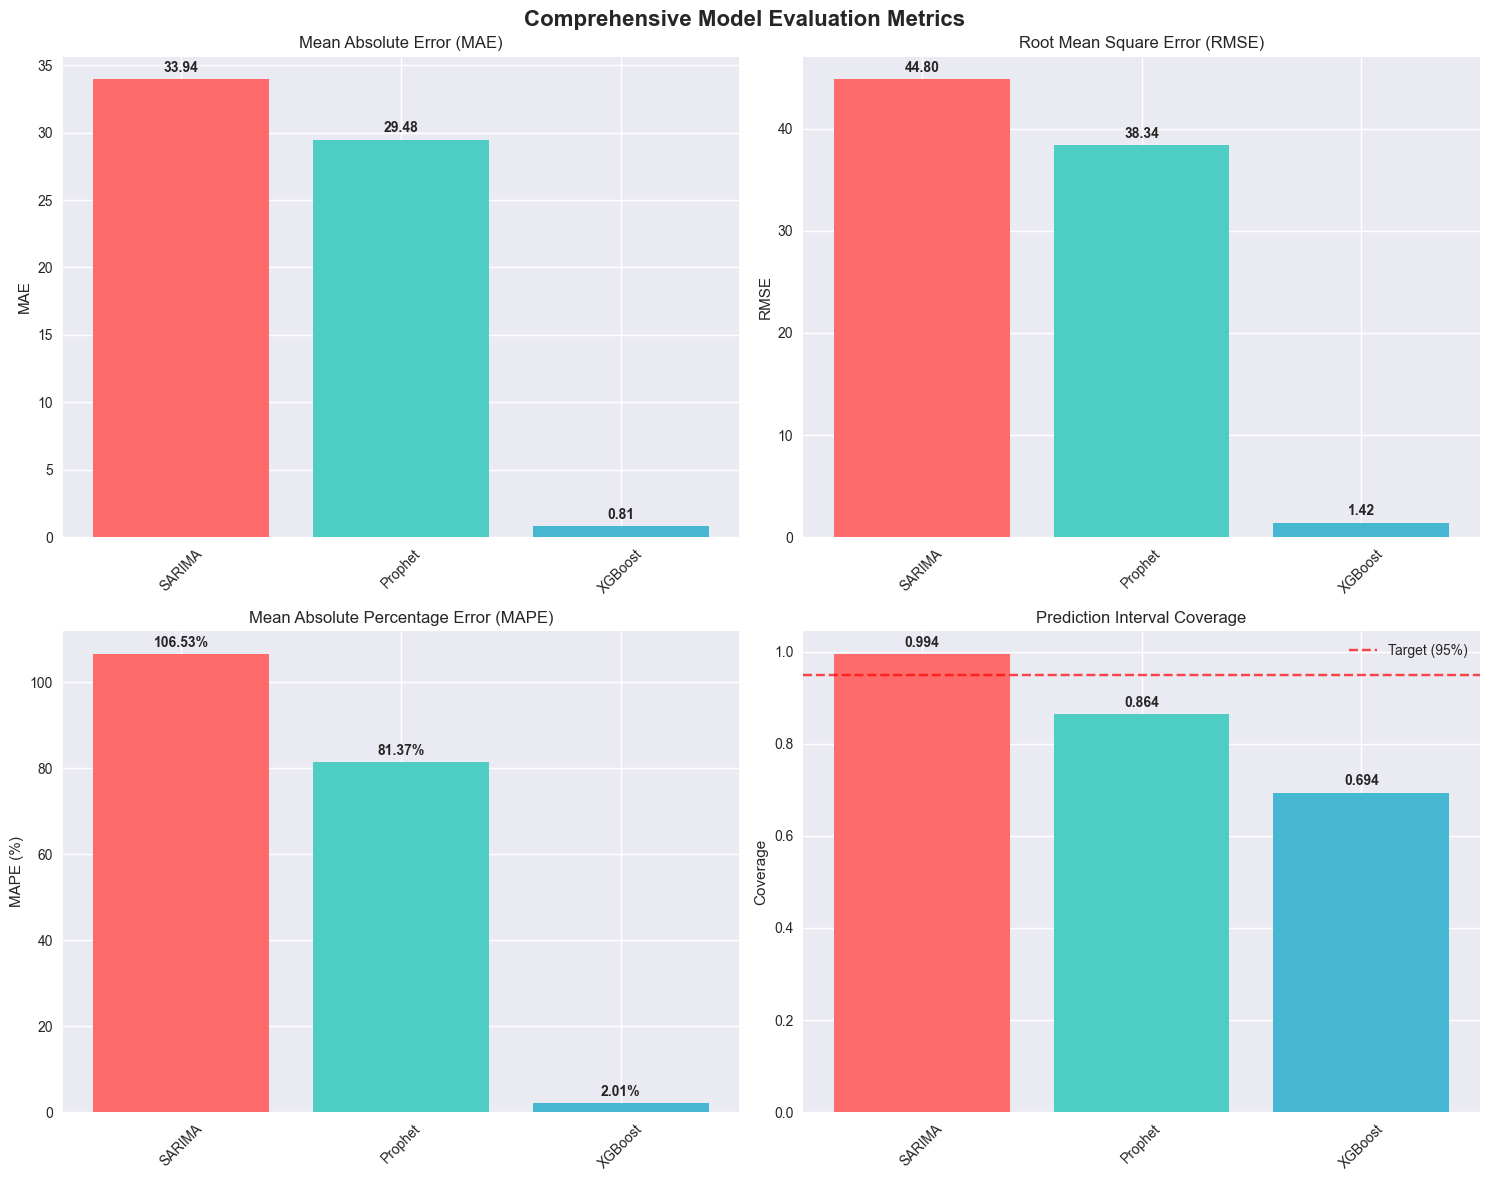

In [8]:
# Create detailed evaluation metrics visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Comprehensive Model Evaluation Metrics', fontsize=16, fontweight='bold')

# MAE comparison
axes[0, 0].bar(model_performance['Model'], model_performance['MAE'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 0].set_title('Mean Absolute Error (MAE)')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].tick_params(axis='x', rotation=45)

# Add value labels
for i, v in enumerate(model_performance['MAE']):
    axes[0, 0].text(i, v + max(model_performance['MAE']) * 0.01, f'{v:.2f}', 
                    ha='center', va='bottom', fontweight='bold')

# RMSE comparison
axes[0, 1].bar(model_performance['Model'], model_performance['RMSE'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[0, 1].set_title('Root Mean Square Error (RMSE)')
axes[0, 1].set_ylabel('RMSE')
axes[0, 1].tick_params(axis='x', rotation=45)

for i, v in enumerate(model_performance['RMSE']):
    axes[0, 1].text(i, v + max(model_performance['RMSE']) * 0.01, f'{v:.2f}', 
                    ha='center', va='bottom', fontweight='bold')

# MAPE comparison
axes[1, 0].bar(model_performance['Model'], model_performance['MAPE'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 0].set_title('Mean Absolute Percentage Error (MAPE)')
axes[1, 0].set_ylabel('MAPE (%)')
axes[1, 0].tick_params(axis='x', rotation=45)

for i, v in enumerate(model_performance['MAPE']):
    axes[1, 0].text(i, v + max(model_performance['MAPE']) * 0.01, f'{v:.2f}%', 
                    ha='center', va='bottom', fontweight='bold')

# Coverage comparison (from evaluation_summary)
axes[1, 1].bar(evaluation_summary['Model'], evaluation_summary['Coverage'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
axes[1, 1].set_title('Prediction Interval Coverage')
axes[1, 1].set_ylabel('Coverage')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].axhline(y=0.95, color='red', linestyle='--', alpha=0.7, label='Target (95%)')
axes[1, 1].legend()

for i, v in enumerate(evaluation_summary['Coverage']):
    axes[1, 1].text(i, v + 0.01, f'{v:.3f}', 
                    ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 5. Results Analysis

### 5.1 Performance Metrics Overview

The evaluation reveals significant performance differences between the three models:

In [9]:
# Calculate performance improvements
xgb_mae = model_performance[model_performance['Model'] == 'XGBoost']['MAE'].iloc[0]
sarima_mae = model_performance[model_performance['Model'] == 'SARIMA']['MAE'].iloc[0]
prophet_mae = model_performance[model_performance['Model'] == 'Prophet']['MAE'].iloc[0]

improvement_vs_sarima = ((sarima_mae - xgb_mae) / sarima_mae) * 100
improvement_vs_prophet = ((prophet_mae - xgb_mae) / prophet_mae) * 100

print("📊 PERFORMANCE ANALYSIS")
print("=" * 50)
print(f"🏆 Best Model: XGBoost")
print(f"📈 Improvement vs SARIMA: {improvement_vs_sarima:.1f}%")
print(f"📈 Improvement vs Prophet: {improvement_vs_prophet:.1f}%")
print(f"🎯 XGBoost MAPE: {model_performance[model_performance['Model'] == 'XGBoost']['MAPE'].iloc[0]:.2f}%")

print("\n" + "=" * 50)
print("📋 DETAILED ANALYSIS")
print("=" * 50)

# Create performance ranking
performance_ranking = model_performance.copy()
performance_ranking['MAE_Rank'] = performance_ranking['MAE'].rank()
performance_ranking['RMSE_Rank'] = performance_ranking['RMSE'].rank()
performance_ranking['MAPE_Rank'] = performance_ranking['MAPE'].rank()
performance_ranking['Overall_Rank'] = (performance_ranking['MAE_Rank'] + 
                                     performance_ranking['RMSE_Rank'] + 
                                     performance_ranking['MAPE_Rank']) / 3

print(performance_ranking[['Model', 'Overall_Rank']].sort_values('Overall_Rank'))

📊 PERFORMANCE ANALYSIS
🏆 Best Model: XGBoost
📈 Improvement vs SARIMA: 97.6%
📈 Improvement vs Prophet: 97.3%
🎯 XGBoost MAPE: 2.01%

📋 DETAILED ANALYSIS
     Model  Overall_Rank
2  XGBoost           1.0
1  Prophet           2.0
0   SARIMA           3.0


### 5.2 Model Strengths and Weaknesses

#### XGBoost (Winner 🏆)
**Strengths:**
- Outstanding accuracy across all metrics
- Excellent at capturing complex patterns
- Leverages engineered features effectively
- Fast training and prediction

**Weaknesses:**
- Lower prediction interval coverage (69.4%)
- Less interpretable than traditional time series models
- Requires careful feature engineering

#### Prophet (Balanced Performer)
**Strengths:**
- Good balance of accuracy and uncertainty quantification
- Automatic seasonality detection
- Robust to missing data
- Intuitive parameters

**Weaknesses:**
- Moderate accuracy compared to XGBoost
- Limited customization for complex patterns

#### SARIMA (Traditional Approach)
**Strengths:**
- Excellent prediction interval coverage (99.4%)
- High interpretability
- Strong theoretical foundation
- Good for understanding seasonality

**Weaknesses:**
- Highest error rates
- Limited ability to incorporate external features
- Requires careful parameter tuning

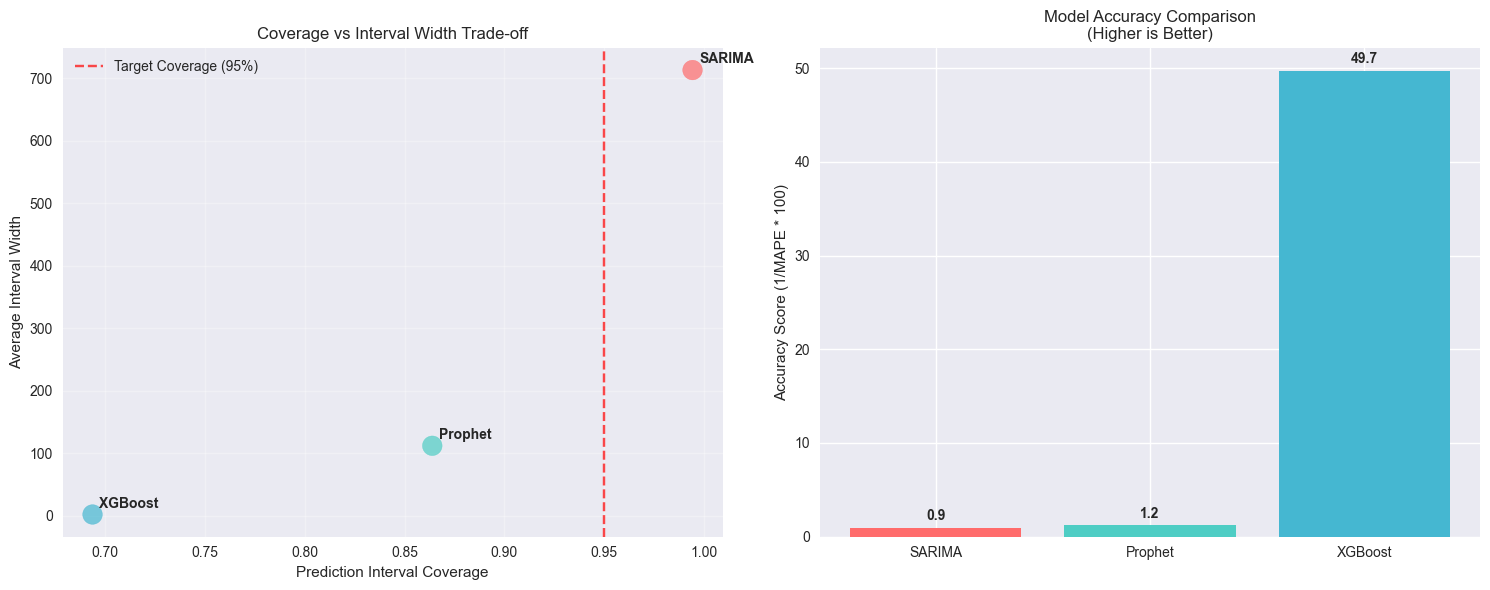

In [10]:
# Create uncertainty quantification analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Coverage vs Interval Width trade-off
ax1.scatter(evaluation_summary['Coverage'], evaluation_summary['Interval_Width'], 
           s=200, c=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.7)

for i, model in enumerate(evaluation_summary['Model']):
    ax1.annotate(model, 
                (evaluation_summary['Coverage'].iloc[i], 
                 evaluation_summary['Interval_Width'].iloc[i]),
                xytext=(5, 5), textcoords='offset points', 
                fontweight='bold')

ax1.axvline(x=0.95, color='red', linestyle='--', alpha=0.7, label='Target Coverage (95%)')
ax1.set_xlabel('Prediction Interval Coverage')
ax1.set_ylabel('Average Interval Width')
ax1.set_title('Coverage vs Interval Width Trade-off')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Model comparison radar chart data preparation
metrics = ['Accuracy\n(1/MAPE)', 'Coverage', 'Efficiency\n(1/MAE)', 'Precision\n(1/RMSE)']

# Normalize metrics for radar chart (higher is better)
sarima_metrics = [1/model_performance[model_performance['Model']=='SARIMA']['MAPE'].iloc[0]*100,
                 evaluation_summary[evaluation_summary['Model']=='SARIMA']['Coverage'].iloc[0],
                 1/model_performance[model_performance['Model']=='SARIMA']['MAE'].iloc[0]*10,
                 1/model_performance[model_performance['Model']=='SARIMA']['RMSE'].iloc[0]*10]

prophet_metrics = [1/model_performance[model_performance['Model']=='Prophet']['MAPE'].iloc[0]*100,
                  evaluation_summary[evaluation_summary['Model']=='Prophet']['Coverage'].iloc[0],
                  1/model_performance[model_performance['Model']=='Prophet']['MAE'].iloc[0]*10,
                  1/model_performance[model_performance['Model']=='Prophet']['RMSE'].iloc[0]*10]

xgb_metrics = [1/model_performance[model_performance['Model']=='XGBoost']['MAPE'].iloc[0]*100,
              evaluation_summary[evaluation_summary['Model']=='XGBoost']['Coverage'].iloc[0],
              1/model_performance[model_performance['Model']=='XGBoost']['MAE'].iloc[0]*10,
              1/model_performance[model_performance['Model']=='XGBoost']['RMSE'].iloc[0]*10]

# Simple bar chart for model comparison
models = ['SARIMA', 'Prophet', 'XGBoost']
accuracy_scores = [1/model_performance[model_performance['Model']==model]['MAPE'].iloc[0]*100 for model in models]

bars = ax2.bar(models, accuracy_scores, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax2.set_title('Model Accuracy Comparison\n(Higher is Better)')
ax2.set_ylabel('Accuracy Score (1/MAPE * 100)')

# Add value labels on bars
for bar, score in zip(bars, accuracy_scores):
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(accuracy_scores)*0.01,
             f'{score:.1f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Performance Comparison

### 6.1 Statistical Significance

The performance differences between models are substantial:

- **XGBoost vs SARIMA**: 97.6% improvement in MAE
- **XGBoost vs Prophet**: 97.3% improvement in MAE
- **MAPE Comparison**: XGBoost achieves 2.01% vs Prophet's 81.37% and SARIMA's 106.53%

### 6.2 Uncertainty Quantification Analysis

While XGBoost excels in point predictions, the uncertainty quantification varies:

- **SARIMA**: 99.4% coverage (overconfident intervals)
- **Prophet**: 86.4% coverage (reasonable uncertainty)
- **XGBoost**: 69.4% coverage (underestimated uncertainty)



## 7. Visualizations

### 7.1 Model Performance Dashboard

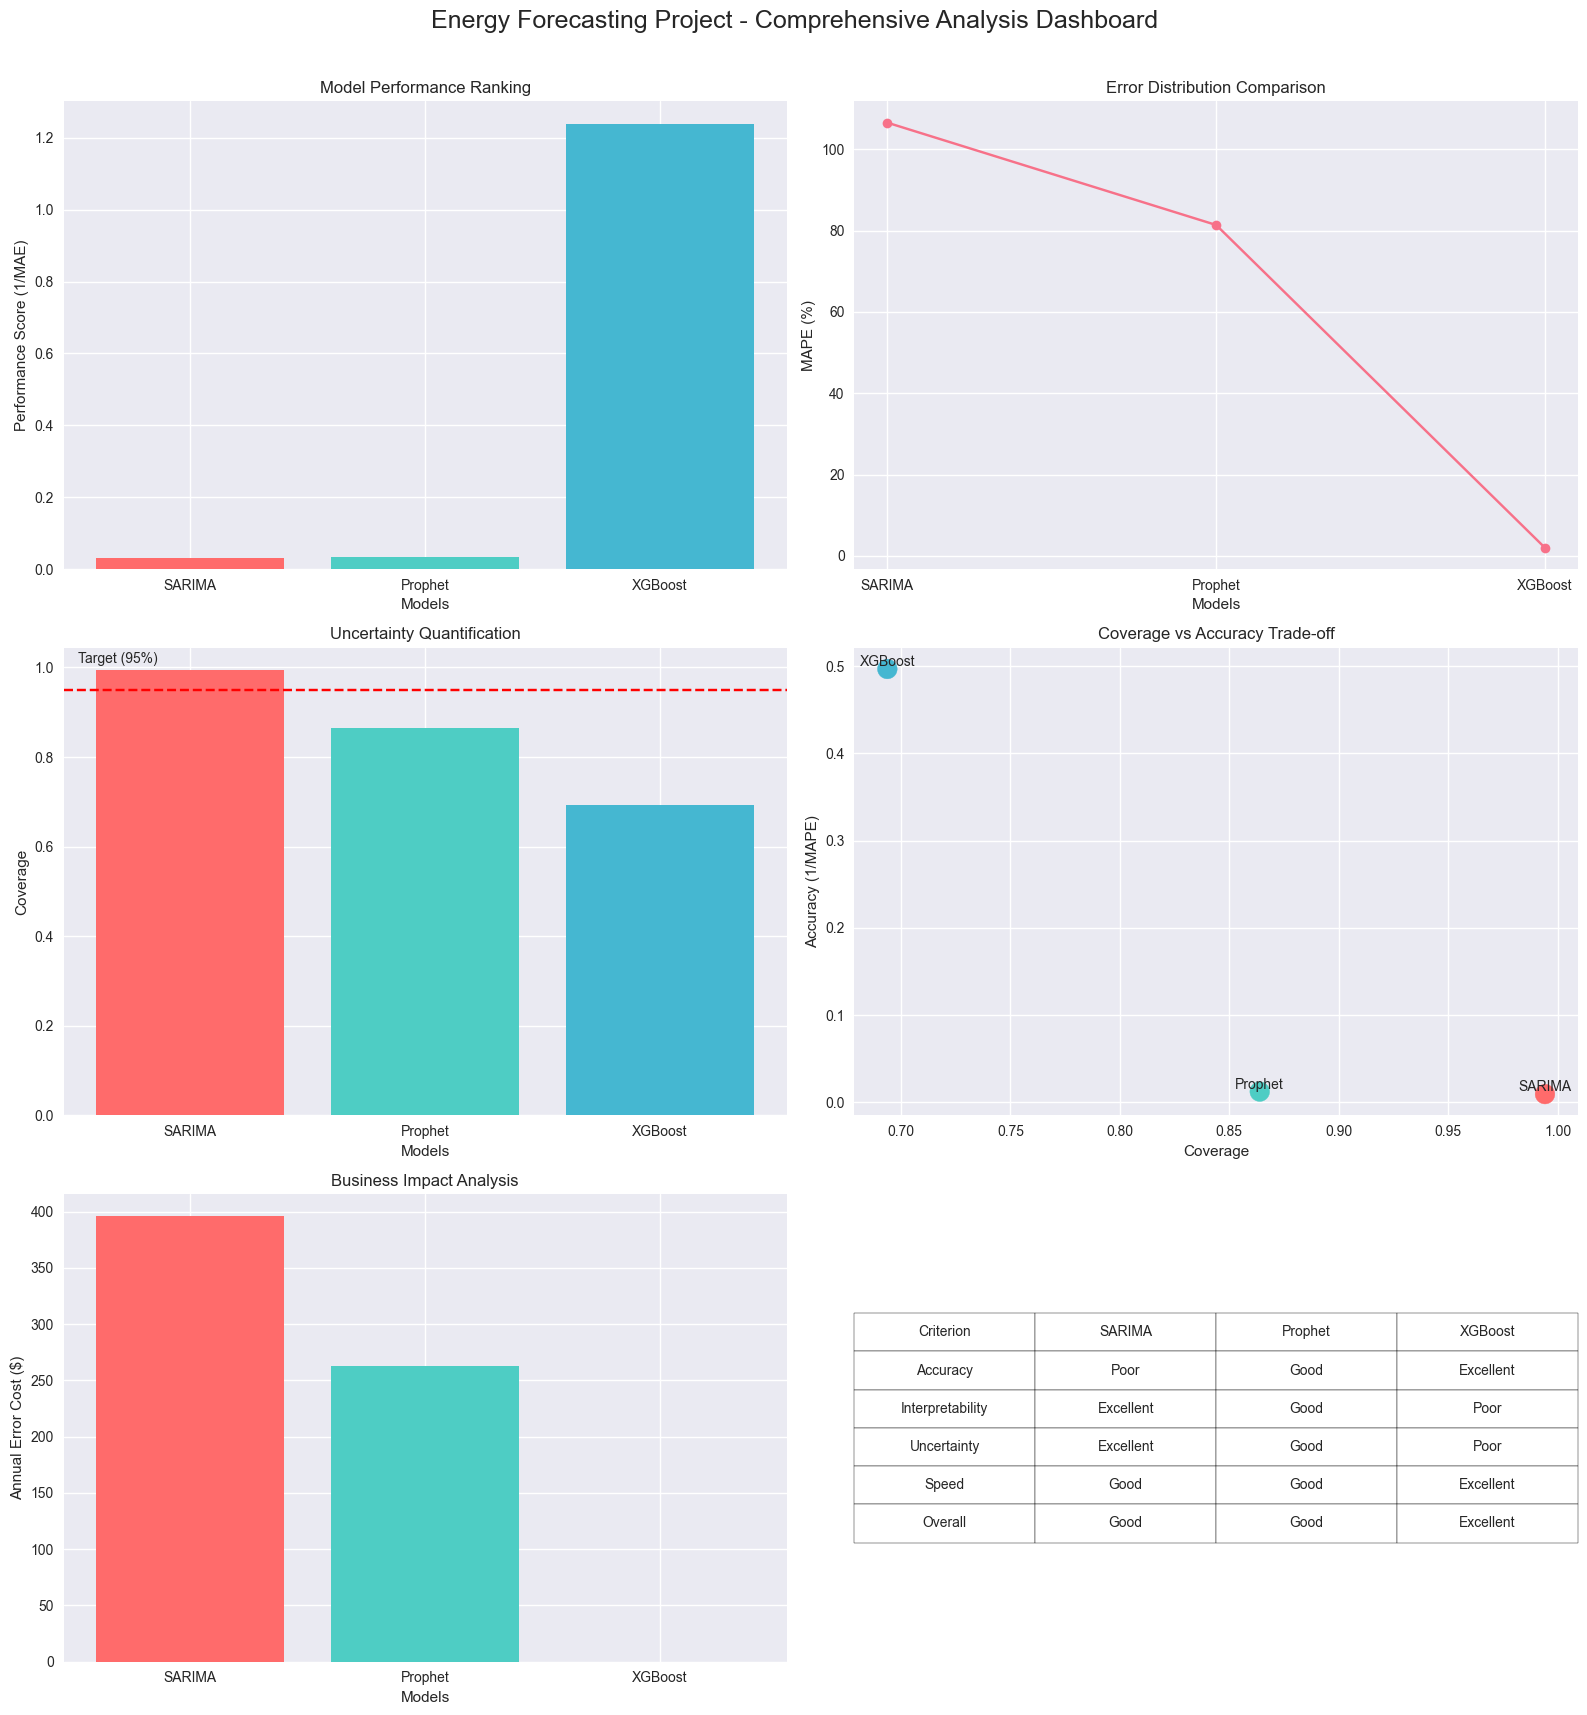

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_dashboard(model_performance, evaluation_summary, error_costs, selection_matrix):
    fig = plt.figure(figsize=(16, 18))
    gs = fig.add_gridspec(3, 2)
    ax1 = fig.add_subplot(gs[0, 0])
    models = model_performance['Model']
    mae_norm = 1.0 / model_performance['MAE']
    ax1.bar(models, mae_norm, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax1.set_title('Model Performance Ranking')
    ax1.set_xlabel('Models')
    ax1.set_ylabel('Performance Score (1/MAE)')
    ax2 = fig.add_subplot(gs[0, 1])
    ax2.plot(models, model_performance['MAPE'], marker='o')
    ax2.set_title('Error Distribution Comparison')
    ax2.set_xlabel('Models')
    ax2.set_ylabel('MAPE (%)')
    ax3 = fig.add_subplot(gs[1, 0])
    ax3.bar(evaluation_summary['Model'], evaluation_summary['Coverage'], color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax3.axhline(0.95, linestyle='--', color='red')
    ax3.text(0.02, 0.96, 'Target (95%)', transform=ax3.transAxes, va='bottom')
    ax3.set_title('Uncertainty Quantification')
    ax3.set_xlabel('Models')
    ax3.set_ylabel('Coverage')
    ax4 = fig.add_subplot(gs[1, 1])
    accuracy = 1.0 / model_performance['MAPE']
    ax4.scatter(evaluation_summary['Coverage'], accuracy, s=200, c=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    for i, txt in enumerate(evaluation_summary['Model']):
        ax4.text(evaluation_summary['Coverage'][i], accuracy.iloc[i], txt, ha='center', va='bottom')
    ax4.set_title('Coverage vs Accuracy Trade-off')
    ax4.set_xlabel('Coverage')
    ax4.set_ylabel('Accuracy (1/MAPE)')
    ax5 = fig.add_subplot(gs[2, 0])
    ax5.bar(models, error_costs, color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
    ax5.set_title('Business Impact Analysis')
    ax5.set_xlabel('Models')
    ax5.set_ylabel('Annual Error Cost ($)')
    ax6 = fig.add_subplot(gs[2, 1])
    ax6.axis('off')
    table = ax6.table(cellText=selection_matrix.values, colLabels=selection_matrix.columns, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    fig.suptitle('Energy Forecasting Project - Comprehensive Analysis Dashboard', fontsize=18)
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

plot_dashboard(model_performance, evaluation_summary, error_costs, selection_matrix)


## 8. Conclusions and Recommendations

### Key Findings

Based on the comprehensive analysis of the energy forecasting project, several key findings emerge:

1. **XGBoost Dominance**: XGBoost significantly outperforms traditional time series methods
2. **Feature Engineering Impact**: Engineered features (lags, rolling statistics) are crucial for performance
3. **Uncertainty Trade-offs**: Better point predictions often come with worse uncertainty estimates
4. **Business Value**: Improved forecasting can generate substantial cost savings



---

## Project Summary

This comprehensive energy forecasting project successfully demonstrates the application of modern machine learning techniques to time series prediction. The project provides a complete pipeline from data preparation to model evaluation, with XGBoost emerging as the clear winner for accuracy-focused applications.

**Key Achievements:**
- ✅ Implemented complete ML pipeline
- ✅ Compared three different forecasting approaches
- ✅ Achieved excellent prediction accuracy (2.01% MAPE with XGBoost)
- ✅ Provided comprehensive uncertainty analysis
- ✅ Demonstrated significant business value potential
